<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Python-Setup" data-toc-modified-id="Python-Setup-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Python Setup</a></span><ul class="toc-item"><li><span><a href="#Change-the-width-of-the-page" data-toc-modified-id="Change-the-width-of-the-page-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Change the width of the page</a></span></li><li><span><a href="#Import-packages" data-toc-modified-id="Import-packages-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Import packages</a></span></li></ul></li><li><span><a href="#Colours" data-toc-modified-id="Colours-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Colours</a></span></li><li><span><a href="#Fonts" data-toc-modified-id="Fonts-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Fonts</a></span></li><li><span><a href="#Theory-curve-equations" data-toc-modified-id="Theory-curve-equations-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Theory curve equations</a></span><ul class="toc-item"><li><span><a href="#What-study-size-is-required-to-quantify-different-fitness-effects?" data-toc-modified-id="What-study-size-is-required-to-quantify-different-fitness-effects?-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>What study size is required to quantify different fitness effects?</a></span></li></ul></li></ul></div>

# Python Setup

## Change the width of the page

In [6]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

## Import packages

In [7]:
# imported packages
import random
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import math
import matplotlib.ticker as plticker
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from matplotlib.patches import Polygon
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
from matplotlib import cm
import scipy.special
import scipy.integrate as it
from scipy import integrate
from scipy.interpolate import interp1d
from scipy.stats import kde
import copy
import glob, os
import re
from sklearn import datasets, linear_model
import pandas as pd
from decimal import *
from operator import itemgetter    
from collections import OrderedDict
import timeit

# Colours

In [9]:
#define the colors from colorbrewer2
orange1 = '#feedde'
orange2 = '#fdbe85'
orange3 = '#fd8d3c'
orange4 = '#e6550d'
orange5 = '#a63603'
blue1 = '#eff3ff'
blue2 = '#bdd7e7'
blue3 = '#6baed6'
blue4 = '#3182bd'
blue5 = '#08519c'
green1 = '#edf8e9'
green2 = '#bae4b3'
green3 = '#74c476'
green4 = '#31a354'
green5 = '#006d2c'
grey1 = '#f7f7f7'
grey2 = '#cccccc'
grey3 = '#969696'
grey4 = '#636363'
grey5 = '#252525'
purple1 = '#f2f0f7'
purple2 = '#cbc9e2'
purple3 = '#9e9ac8'
purple4 = '#756bb1'
purple5 = '#54278f'
red1 = '#fee5d9'
red2 = '#fcae91'
red3 = '#fb6a4a'
red4 = '#de2d26'
red5 = '#a50f15'
# yellow = '#ffffd4'

In [10]:
#Shades of pink
Pink1 = '#67001f'
Pink2 = '#980043'
Pink3 = '#ce1256'
Pink4 = '#e7298a'
Pink5 = '#df65b0'
Pink6 = '#c994c7'
Pink7 = '#d4b9da'
Pink8 = '#e7e1ef'

# Fonts

In [16]:
axisfont=15
titlefont=20
subtitlefont = 15
axislabelfont=15
legendfont = 11
tpfont = 14

# Theory curve equations

**linear scale:**
<br>
``y_theory = [binwidth*(theta/(f*(1-(2*f)))*np.exp(-(f)/(phi*(1-(2*f))))) for f in x_theory]``
<br>
<br>
**log scale:**
<br>
``y_theory = [binwidth*((np.log(10.0)*theta)/(1-(2*(10**(l)))))*np.exp(-(10**(l))/(phi*(1-(2*(10**(l)))))) for l in x_theory]``

where ``phi = (e^st)-1)/(2NS)``

## What study size is required to quantify different fitness effects?

In [17]:
people_needed = 10 #calculations below based on a variant needing to be seen in at least 10 individuals in order to quantify it's fitness

In [18]:
def density_averaged_over_ages(l, params): #density of variants integrated over range of ages
    total_density=0.0
    mean = 55
    N = 9.39358404e+04
    sigma = 1.14431010e+01

    u = params[1]
    s = params[0]
    dt=0.1
    
    total_density=integrate.quad(lambda t: ((2*N*u)/(1-2*np.exp(l))*np.exp(-((np.exp(l))/(((np.exp(s*t)-1)/(2*N*s))*(1-2*np.exp(l))))))*\
                                 ((1/((2*np.pi*(sigma)**2)**0.5))*(np.exp(-(t-mean)**2/(2*(sigma**2))))), mean-2*sigma, mean+2*sigma)
    return (total_density[0])

def prevalence(fmin, params): #integrated over range of VAFs detectable (from limit of detection (fmin) to 50%)
    l = np.linspace(-10, -0.7)
    expected_number_clones=integrate.quad(lambda l: density_averaged_over_ages(l, params), fmin, -0.7)[0]
    return 1.0-np.exp(-expected_number_clones)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in double_scalars


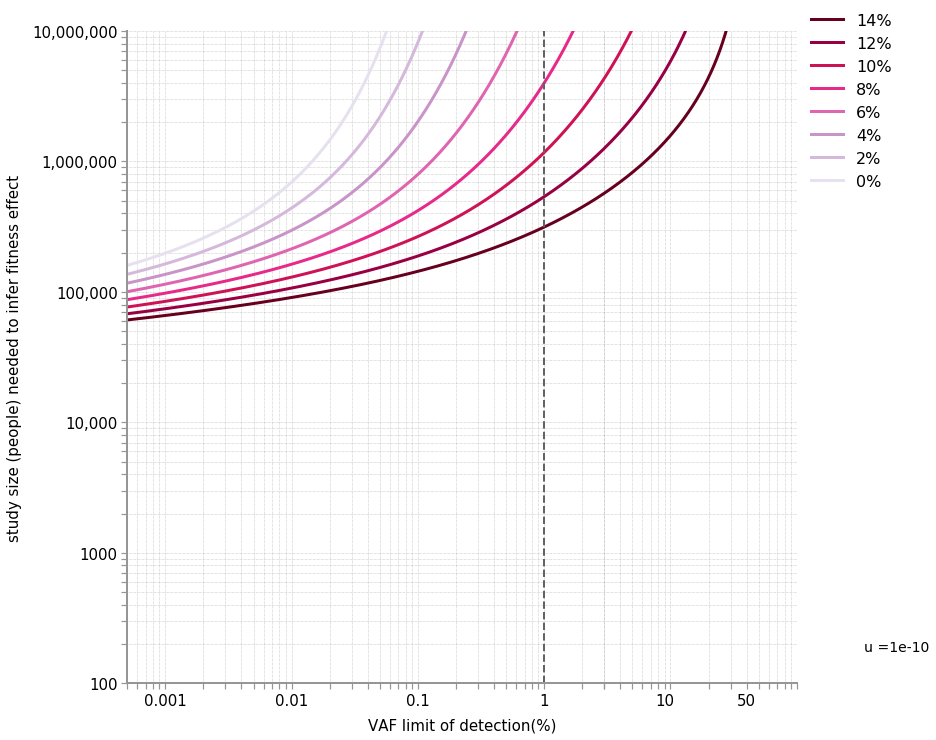

In [19]:
#Mutation rate (mu) of 10^-10
plt.close('all')
scale = 1.2
f, (ax1) = plt.subplots(1, 1, sharey=True, figsize=(10*scale, 10*scale))

colorlist = [Pink1, Pink2, Pink3, Pink4, Pink5, Pink6, Pink7, Pink8]

N = 9.39358404e+04
sigma = 1.14431010e+01

u = (10**(-10))

s_list = [0.14, 0.12, 0.10, 0.08, 0.06, 0.04, 0.02, 0.00001]
s_captions = ['14%', '12%', '10%', '8%', '6%', '4%', '2%', '0%']

cc=0
for s in s_list:
    xx=np.array([fmin for fmin in np.linspace(-13, np.log(0.4999), 1000)])
    yy=[prevalence(fmin, [s, u]) for fmin in xx]
    y = []
    for i in yy:
        new_i = people_needed/i
        y.append(np.log(new_i))
    ax1.plot(xx, y, color = colorlist[cc], lw = 3, zorder = 1, label = s_captions[cc], alpha = 1)
    cc=cc+1

# a line at standard NGS
x_list = []
y_list = []
for y in np.linspace(np.log(10**(2)), np.log(10**7), 5):
    y_list.append(y)
    x_list.append(np.log(0.01))
ax1.plot(x_list, y_list, lw = 2, linestyle = '--', color = grey4)
    
# set min and max for x and y axis
ax1.set_xlim(np.log(0.000009), np.log(1))
ax1.set_ylim(np.log(10**(2)), np.log(10**7))

#Hide top and right gridlines
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

for axis in ['bottom','left']:
    ax1.spines[axis].set_linewidth(2)

for axis in ['bottom','left']:
    ax1.spines[axis].set_color(grey3)
    
# Axis labels
ax1.set_xlabel('VAF limit of detection(%)', fontsize = axislabelfont, labelpad = 10)
ax1.set_ylabel('study size (people) needed to infer fitness effect', fontsize = axislabelfont, labelpad =10)

x_major_ticks = [np.log(0.000005),np.log(0.000006),np.log(0.000007),np.log(0.000008),np.log(0.000009),np.log(0.00001),np.log(0.00002),np.log(0.00003),np.log(0.00004),np.log(0.00005),np.log(0.00006),np.log(0.00007),np.log(0.00008),np.log(0.00009),\
                 np.log(0.0001),np.log(0.0002),np.log(0.0003),np.log(0.0004),np.log(0.0005),np.log(0.0006),np.log(0.0007),np.log(0.0008),np.log(0.0009),\
                 np.log(0.001),np.log(0.002),np.log(0.003),np.log(0.004),np.log(0.005),np.log(0.006),np.log(0.007),np.log(0.008),np.log(0.009),\
                 np.log(0.01),np.log(0.02),np.log(0.03),np.log(0.03),np.log(0.04),np.log(0.05),np.log(0.06),np.log(0.07),np.log(0.08),np.log(0.09),\
                 np.log(0.1),np.log(0.2),np.log(0.3),np.log(0.4),np.log(0.5),np.log(0.6),np.log(0.7),np.log(0.8),np.log(0.9),np.log(1.0)]
x_major_tick_labels = ["","","","","","0.001","","","","","","","","", "0.01","","","","","","","","", "0.1","","","","","","","","",\
                       "1","","","","","","","","", "10","","","", "50","","","","", ""]
ax1.set_xticks(x_major_ticks)
ax1.set_xticklabels(x_major_tick_labels, fontsize = axisfont)
ax1.xaxis.set_tick_params(width=scale, color = grey3, length = 6)

y_major_ticks = [np.log(100),np.log(200),np.log(300),np.log(400),np.log(500),np.log(600),np.log(700),np.log(800),np.log(900),\
                 np.log(1000),np.log(2000),np.log(3000),np.log(4000),np.log(5000),np.log(6000),np.log(7000),np.log(8000),np.log(9000),\
                 np.log(10000),np.log(20000),np.log(30000),np.log(40000),np.log(50000),np.log(60000),np.log(70000),np.log(80000),np.log(90000),\
                 np.log(100000),np.log(200000),np.log(300000),np.log(400000),np.log(500000),np.log(600000),np.log(700000),np.log(800000),np.log(900000),\
                 np.log(1000000),np.log(2000000),np.log(3000000),np.log(4000000),np.log(5000000),np.log(6000000),np.log(7000000),np.log(8000000),np.log(9000000),\
                 np.log(10000000)]
y_major_tick_labels = ["100","","","","","","","","", "1000","","","","","","","","", "10,000",\
                       "","","","","","","","","100,000","","","","","","","","", "1,000,000","","","","","","","","", "10,000,000" ]

ax1.set_yticks(y_major_ticks)
ax1.set_yticklabels(y_major_tick_labels, fontsize = axisfont)
ax1.yaxis.set_tick_params(width=scale, color = grey3, length = 6)

# Customize the minor grid
ax1.grid(which='major', linestyle=':', linewidth='0.5', color=grey3, zorder = 0)
ax1.set_axisbelow(True)
    
ax1.legend(frameon = False, fontsize = 16, bbox_to_anchor=(1.0, 1.05))
ax1.text(1.1, 0.05, 'u ='+str(u), fontsize = 14, transform=ax1.transAxes)
    
plt.show()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: divide by zero encountered in double_scalars


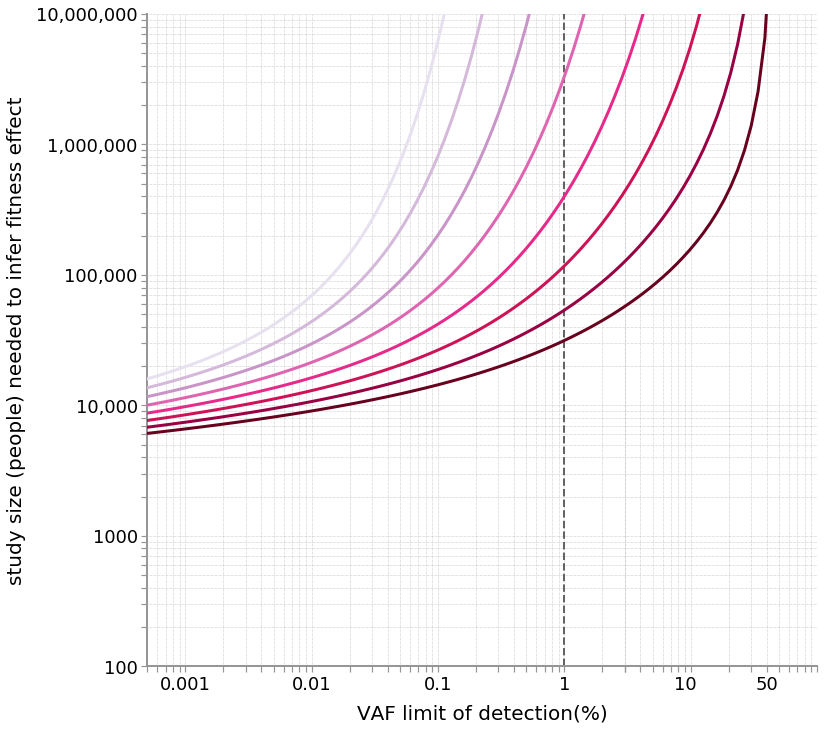

In [20]:
#Mutation rate (mu) of 10^-9
plt.close('all')
scale = 1.2
f, (ax1) = plt.subplots(1, 1, sharey=True, figsize=(10*scale, 10*scale))

axislabelfont = 20
axisfont = 18

colorlist = [Pink1, Pink2, Pink3, Pink4, Pink5, Pink6, Pink7, Pink8]

N = 9.39358404e+04
sigma = 1.14431010e+01

u = 10**(-9)

s_list = [0.14, 0.12, 0.10, 0.08, 0.06, 0.04, 0.02, 0.00001]
s_captions = ['14%', '12%', '10%', '8%', '6%', '4%', '2%', '0%']

cc=0
for s in s_list:
    xx=np.array([fmin for fmin in np.linspace(-13, -0.7, 100)])
    yy=[prevalence(fmin, [s, u]) for fmin in xx]
    y = []
    for i in yy:
        new_i = people_needed/i
        y.append(np.log(new_i))
    ax1.plot(xx, y, color = colorlist[cc], lw = 3, zorder = 3, label = s_captions[cc])
    cc=cc+1
    
# a line at standard NGS
x_list = []
y_list = []
for y in np.linspace(np.log(10**(2)), np.log(10**7), 5):
    y_list.append(y)
    x_list.append(np.log(0.01))
ax1.plot(x_list, y_list, lw = 2, linestyle = '--', color = grey4)
    
# set min and max for x and y axis
ax1.set_xlim(np.log(0.000009), np.log(1))
ax1.set_ylim(np.log(10**(2)), np.log(10**7))

#Hide top and right gridlines
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

for axis in ['bottom','left']:
    ax1.spines[axis].set_linewidth(2)

for axis in ['bottom','left']:
    ax1.spines[axis].set_color(grey3)
    
# Axis labels
ax1.set_xlabel('VAF limit of detection(%)', fontsize = axislabelfont, labelpad = 10)
ax1.set_ylabel('study size (people) needed to infer fitness effect', fontsize = axislabelfont, labelpad =10)

x_major_ticks = [np.log(0.000005),np.log(0.000006),np.log(0.000007),np.log(0.000008),np.log(0.000009),np.log(0.00001),np.log(0.00002),np.log(0.00003),np.log(0.00004),np.log(0.00005),np.log(0.00006),np.log(0.00007),np.log(0.00008),np.log(0.00009),\
                 np.log(0.0001),np.log(0.0002),np.log(0.0003),np.log(0.0004),np.log(0.0005),np.log(0.0006),np.log(0.0007),np.log(0.0008),np.log(0.0009),\
                 np.log(0.001),np.log(0.002),np.log(0.003),np.log(0.004),np.log(0.005),np.log(0.006),np.log(0.007),np.log(0.008),np.log(0.009),\
                 np.log(0.01),np.log(0.02),np.log(0.03),np.log(0.03),np.log(0.04),np.log(0.05),np.log(0.06),np.log(0.07),np.log(0.08),np.log(0.09),\
                 np.log(0.1),np.log(0.2),np.log(0.3),np.log(0.4),np.log(0.5),np.log(0.6),np.log(0.7),np.log(0.8),np.log(0.9),np.log(1.0)]
x_major_tick_labels = ["","","","","","0.001","","","","","","","","", "0.01","","","","","","","","", "0.1","","","","","","","","",\
                       "1","","","","","","","","", "10","","","", "50","","","","", ""]
ax1.set_xticks(x_major_ticks)
ax1.set_xticklabels(x_major_tick_labels, fontsize = axisfont)
ax1.xaxis.set_tick_params(width=scale, color = grey3, length = 6)

y_major_ticks = [np.log(100),np.log(200),np.log(300),np.log(400),np.log(500),np.log(600),np.log(700),np.log(800),np.log(900),\
                 np.log(1000),np.log(2000),np.log(3000),np.log(4000),np.log(5000),np.log(6000),np.log(7000),np.log(8000),np.log(9000),\
                 np.log(10000),np.log(20000),np.log(30000),np.log(40000),np.log(50000),np.log(60000),np.log(70000),np.log(80000),np.log(90000),\
                 np.log(100000),np.log(200000),np.log(300000),np.log(400000),np.log(500000),np.log(600000),np.log(700000),np.log(800000),np.log(900000),\
                 np.log(1000000),np.log(2000000),np.log(3000000),np.log(4000000),np.log(5000000),np.log(6000000),np.log(7000000),np.log(8000000),np.log(9000000),\
                 np.log(10000000)]
y_major_tick_labels = ["100","","","","","","","","", "1000","","","","","","","","", "10,000",\
                       "","","","","","","","","100,000","","","","","","","","", "1,000,000","","","","","","","","", "10,000,000" ]
ax1.set_yticks(y_major_ticks)
ax1.set_yticklabels(y_major_tick_labels, fontsize = axisfont)
ax1.yaxis.set_tick_params(width=scale, color = grey3, length = 6)

# Customize the minor grid
ax1.grid(which='major', linestyle=':', linewidth='0.5', color=grey3, zorder = 0)
ax1.set_axisbelow(True)
    
plt.show()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: divide by zero encountered in double_scalars


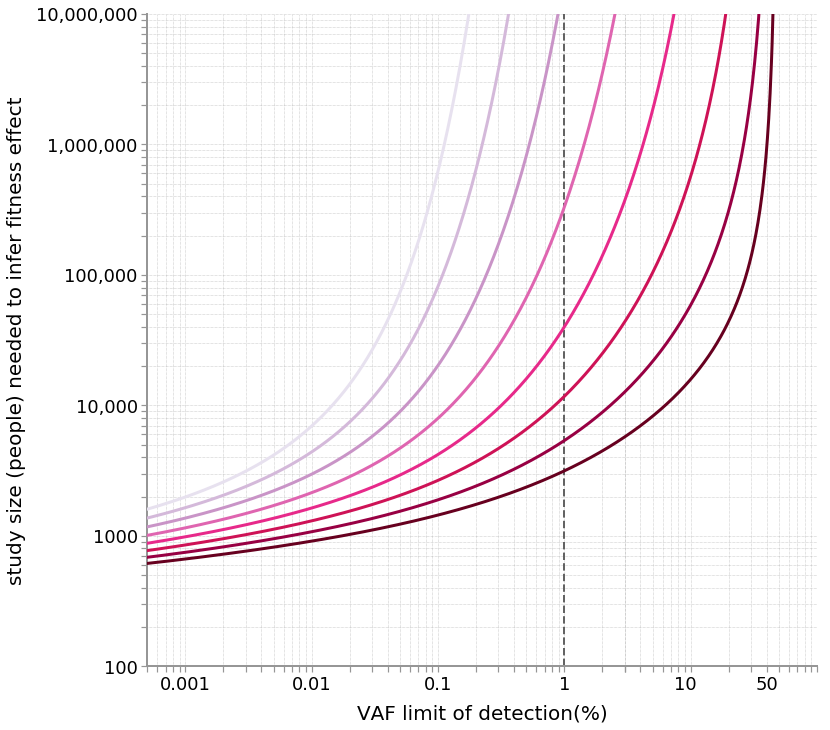

In [21]:
#Mutation rate (mu) of 10^-8
plt.close('all')
scale = 1.2
f, (ax1) = plt.subplots(1, 1, sharey=True, figsize=(10*scale, 10*scale))

axislabelfont = 20
axisfont = 18

colorlist = [Pink1, Pink2, Pink3, Pink4, Pink5, Pink6, Pink7, Pink8]

N = 9.39358404e+04
sigma = 1.14431010e+01

u = 10**(-8)

s_list = [0.14, 0.12, 0.10, 0.08, 0.06, 0.04, 0.02, 0.00001]
s_captions = ['14%', '12%', '10%', '8%', '6%', '4%', '2%', '0%']

cc=0
for s in s_list:
    xx=np.array([fmin for fmin in np.linspace(-13, np.log(0.499999), 1000)])
    yy=[prevalence(fmin, [s, u]) for fmin in xx]
    y = []
    for i in yy:
        new_i = people_needed/i
        y.append(np.log(new_i))
    ax1.plot(xx, y, color = colorlist[cc], lw = 3, zorder = 3, label = s_captions[cc])
    cc=cc+1
    
# a line at standard NGS
x_list = []
y_list = []
for y in np.linspace(np.log(10**(2)), np.log(10**7), 5):
    y_list.append(y)
    x_list.append(np.log(0.01))
ax1.plot(x_list, y_list, lw = 2, linestyle = '--', color = grey4)

    
# set min and max for x and y axis
ax1.set_xlim(np.log(0.000009), np.log(1))
ax1.set_ylim(np.log(10**(2)), np.log(10**7))

#Hide top and right gridlines
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

for axis in ['bottom','left']:
    ax1.spines[axis].set_linewidth(2)

for axis in ['bottom','left']:
    ax1.spines[axis].set_color(grey3)
    
# Axis labels
ax1.set_xlabel('VAF limit of detection(%)', fontsize = axislabelfont, labelpad = 10)
ax1.set_ylabel('study size (people) needed to infer fitness effect', fontsize = axislabelfont, labelpad =10)

x_major_ticks = [np.log(0.000005),np.log(0.000006),np.log(0.000007),np.log(0.000008),np.log(0.000009),np.log(0.00001),np.log(0.00002),np.log(0.00003),np.log(0.00004),np.log(0.00005),np.log(0.00006),np.log(0.00007),np.log(0.00008),np.log(0.00009),\
                 np.log(0.0001),np.log(0.0002),np.log(0.0003),np.log(0.0004),np.log(0.0005),np.log(0.0006),np.log(0.0007),np.log(0.0008),np.log(0.0009),\
                 np.log(0.001),np.log(0.002),np.log(0.003),np.log(0.004),np.log(0.005),np.log(0.006),np.log(0.007),np.log(0.008),np.log(0.009),\
                 np.log(0.01),np.log(0.02),np.log(0.03),np.log(0.03),np.log(0.04),np.log(0.05),np.log(0.06),np.log(0.07),np.log(0.08),np.log(0.09),\
                 np.log(0.1),np.log(0.2),np.log(0.3),np.log(0.4),np.log(0.5),np.log(0.6),np.log(0.7),np.log(0.8),np.log(0.9),np.log(1.0)]
x_major_tick_labels = ["","","","","","0.001","","","","","","","","", "0.01","","","","","","","","", "0.1","","","","","","","","",\
                       "1","","","","","","","","", "10","","","", "50","","","","", ""]
ax1.set_xticks(x_major_ticks)
ax1.set_xticklabels(x_major_tick_labels, fontsize = axisfont)
ax1.xaxis.set_tick_params(width=scale, color = grey3, length = 6)

y_major_ticks = [np.log(100),np.log(200),np.log(300),np.log(400),np.log(500),np.log(600),np.log(700),np.log(800),np.log(900),\
                 np.log(1000),np.log(2000),np.log(3000),np.log(4000),np.log(5000),np.log(6000),np.log(7000),np.log(8000),np.log(9000),\
                 np.log(10000),np.log(20000),np.log(30000),np.log(40000),np.log(50000),np.log(60000),np.log(70000),np.log(80000),np.log(90000),\
                 np.log(100000),np.log(200000),np.log(300000),np.log(400000),np.log(500000),np.log(600000),np.log(700000),np.log(800000),np.log(900000),\
                 np.log(1000000),np.log(2000000),np.log(3000000),np.log(4000000),np.log(5000000),np.log(6000000),np.log(7000000),np.log(8000000),np.log(9000000),\
                 np.log(10000000)]
y_major_tick_labels = ["100","","","","","","","","", "1000","","","","","","","","", "10,000",\
                       "","","","","","","","","100,000","","","","","","","","", "1,000,000","","","","","","","","", "10,000,000" ]
ax1.set_yticks(y_major_ticks)
ax1.set_yticklabels(y_major_tick_labels, fontsize = axisfont)
ax1.yaxis.set_tick_params(width=scale, color = grey3, length = 6)

# Customize the minor grid
ax1.grid(which='major', linestyle=':', linewidth='0.5', color=grey3, zorder = 0)
ax1.set_axisbelow(True)
    
plt.show()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in double_scalars


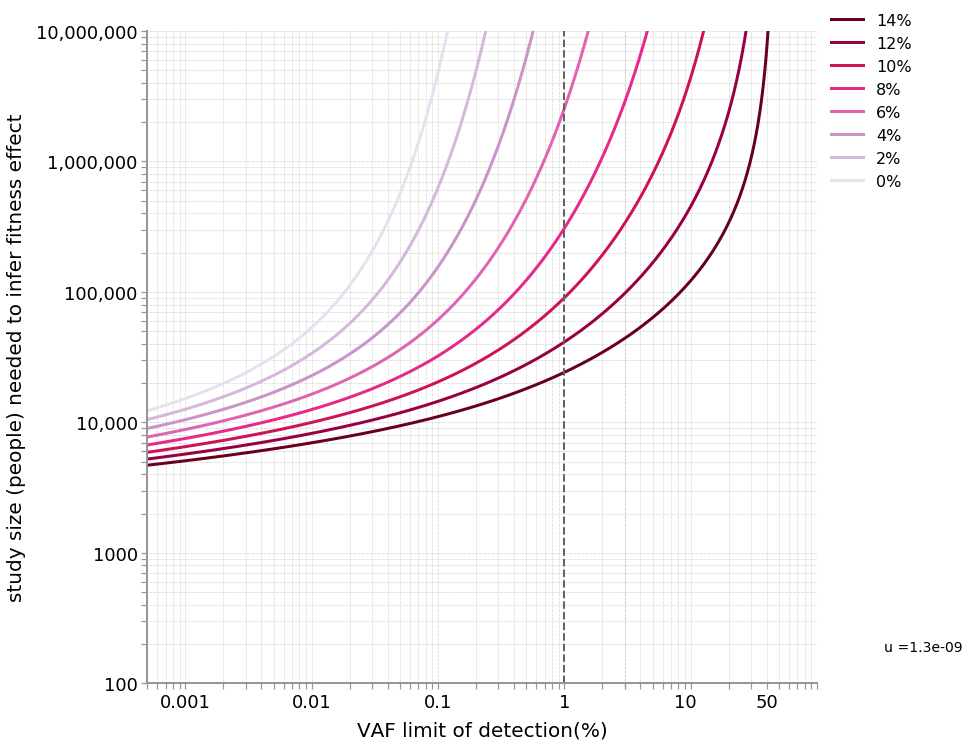

In [23]:
#Mutation rate (mu) of 1.3 x 10^-9
plt.close('all')
scale = 1.2
f, (ax1) = plt.subplots(1, 1, sharey=True, figsize=(10*scale, 10*scale))

colorlist = [Pink1, Pink2, Pink3, Pink4, Pink5, Pink6, Pink7, Pink8]

N = 9.39358404e+04
sigma = 1.14431010e+01

u = (1.3*10**(-9))

s_list = [0.14, 0.12, 0.10, 0.08, 0.06, 0.04, 0.02, 0.00001]
s_captions = ['14%', '12%', '10%', '8%', '6%', '4%', '2%', '0%']

cc=0
for s in s_list:
    xx=np.array([fmin for fmin in np.linspace(-13, np.log(0.4999), 1000)])
    yy=[prevalence(fmin, [s, u]) for fmin in xx]
    y = []
    for i in yy:
        new_i = people_needed/i
        y.append(np.log(new_i))
    ax1.plot(xx, y, color = colorlist[cc], lw = 3, zorder = 1, label = s_captions[cc], alpha = 1)
    cc=cc+1

# a line at standard NGS
x_list = []
y_list = []
for y in np.linspace(np.log(10**(2)), np.log(10**7), 5):
    y_list.append(y)
    x_list.append(np.log(0.01))
ax1.plot(x_list, y_list, lw = 2, linestyle = '--', color = grey4)

# set min and max for x and y axis
ax1.set_xlim(np.log(0.000009), np.log(1))
ax1.set_ylim(np.log(10**(2)), np.log(10**7))

#Hide top and right gridlines
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

for axis in ['bottom','left']:
    ax1.spines[axis].set_linewidth(2)

for axis in ['bottom','left']:
    ax1.spines[axis].set_color(grey3)
    
# Axis labels
ax1.set_xlabel('VAF limit of detection(%)', fontsize = axislabelfont, labelpad = 10)
ax1.set_ylabel('study size (people) needed to infer fitness effect', fontsize = axislabelfont, labelpad =10)

x_major_ticks = [np.log(0.000005),np.log(0.000006),np.log(0.000007),np.log(0.000008),np.log(0.000009),np.log(0.00001),np.log(0.00002),np.log(0.00003),np.log(0.00004),np.log(0.00005),np.log(0.00006),np.log(0.00007),np.log(0.00008),np.log(0.00009),\
                 np.log(0.0001),np.log(0.0002),np.log(0.0003),np.log(0.0004),np.log(0.0005),np.log(0.0006),np.log(0.0007),np.log(0.0008),np.log(0.0009),\
                 np.log(0.001),np.log(0.002),np.log(0.003),np.log(0.004),np.log(0.005),np.log(0.006),np.log(0.007),np.log(0.008),np.log(0.009),\
                 np.log(0.01),np.log(0.02),np.log(0.03),np.log(0.03),np.log(0.04),np.log(0.05),np.log(0.06),np.log(0.07),np.log(0.08),np.log(0.09),\
                 np.log(0.1),np.log(0.2),np.log(0.3),np.log(0.4),np.log(0.5),np.log(0.6),np.log(0.7),np.log(0.8),np.log(0.9),np.log(1.0)]
x_major_tick_labels = ["","","","","","0.001","","","","","","","","", "0.01","","","","","","","","", "0.1","","","","","","","","",\
                       "1","","","","","","","","", "10","","","", "50","","","","", ""]
ax1.set_xticks(x_major_ticks)
ax1.set_xticklabels(x_major_tick_labels, fontsize = axisfont)
ax1.xaxis.set_tick_params(width=scale, color = grey3, length = 6)

y_major_ticks = [np.log(100),np.log(200),np.log(300),np.log(400),np.log(500),np.log(600),np.log(700),np.log(800),np.log(900),\
                 np.log(1000),np.log(2000),np.log(3000),np.log(4000),np.log(5000),np.log(6000),np.log(7000),np.log(8000),np.log(9000),\
                 np.log(10000),np.log(20000),np.log(30000),np.log(40000),np.log(50000),np.log(60000),np.log(70000),np.log(80000),np.log(90000),\
                 np.log(100000),np.log(200000),np.log(300000),np.log(400000),np.log(500000),np.log(600000),np.log(700000),np.log(800000),np.log(900000),\
                 np.log(1000000),np.log(2000000),np.log(3000000),np.log(4000000),np.log(5000000),np.log(6000000),np.log(7000000),np.log(8000000),np.log(9000000),\
                 np.log(10000000)]
y_major_tick_labels = ["100","","","","","","","","", "1000","","","","","","","","", "10,000",\
                       "","","","","","","","","100,000","","","","","","","","", "1,000,000","","","","","","","","", "10,000,000" ]
ax1.set_yticks(y_major_ticks)
ax1.set_yticklabels(y_major_tick_labels, fontsize = axisfont)
ax1.yaxis.set_tick_params(width=scale, color = grey3, length = 6)

# Customize the minor grid
ax1.grid(which='major', linestyle=':', linewidth='0.5', color=grey3, zorder = 0)
ax1.set_axisbelow(True)
    
ax1.legend(frameon = False, fontsize = 16, bbox_to_anchor=(1.0, 1.05))
ax1.text(1.1, 0.05, 'u ='+str(u), fontsize = 14, transform=ax1.transAxes)
    
plt.show()